Dataset Loaded...


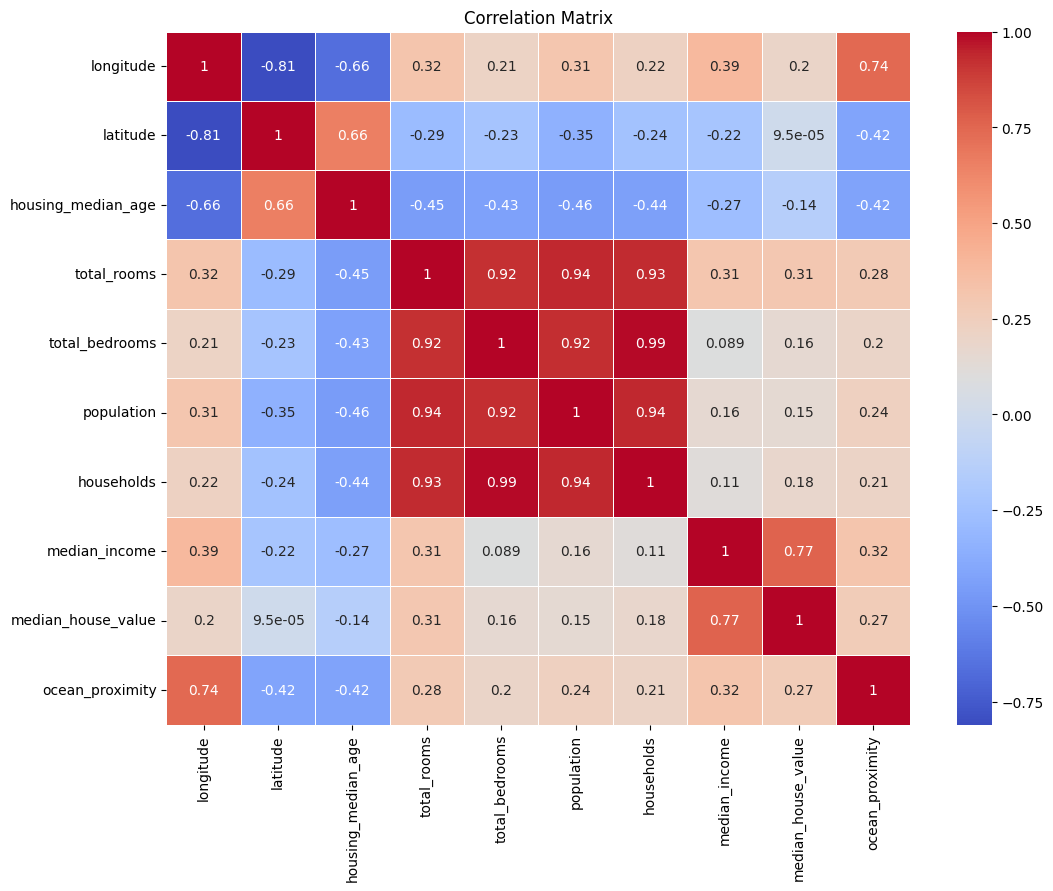

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns  # <-- Added for heatmap visualization
import matplotlib.pyplot as plt  


from sklearn.impute import SimpleImputer

housing_df = pd.read_csv("housing.csv", nrows=1000)
print('Dataset Loaded...')
housing_df.head()

numerical = housing_df.drop(columns=['ocean_proximity'], axis=1)

# Convert Categorical values to numerical
categorical = housing_df.filter(['ocean_proximity'])
myMapCat = {'NEAR BAY': 1, 'NEAR OCEAN': 2, '<1H OCEAN': 3, 'INLAND': 4, 'ISLAND': 5}
newCat = categorical.replace(myMapCat)

myTable = pd.concat([numerical, newCat], axis=1)


# 1. Handle Missing Values

# Impute missing values with median for numerical columns
imputer = SimpleImputer(strategy='median')
numerical_imputed = pd.DataFrame(imputer.fit_transform(numerical), columns=numerical.columns)

# Assuming no missing values in the categorical column. 
# If there are, consider using the most frequent value or a placeholder value.

# 2. Feature Scaling

# Standard Scaling of the numerical features
scaler = StandardScaler()
numerical_scaled = pd.DataFrame(scaler.fit_transform(numerical_imputed), columns=numerical.columns)

# Combine scaled numerical features and categorical features
processed_data = pd.concat([numerical_scaled, newCat], axis=1)

correlation_matrix = processed_data.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


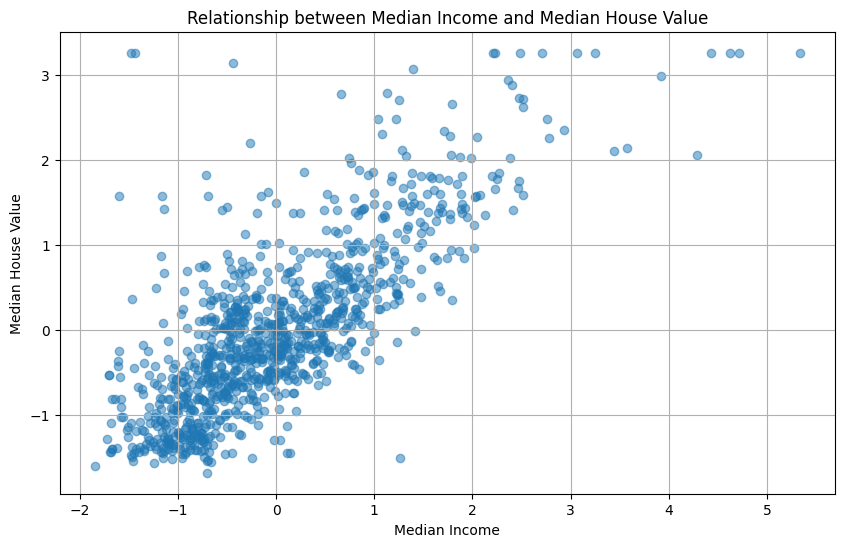

In [41]:
# ... [your existing code]

# Scatter plot for median_income vs median_house_value
plt.figure(figsize=(10, 6))
plt.scatter(processed_data['median_income'], processed_data['median_house_value'], alpha=0.5)
plt.title('Relationship between Median Income and Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()


In [ ]:


# 4. Train-Test Split

X = processed_data.drop(['median_house_value'], axis=1)
y = processed_data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Training a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Making predictions on the test set
y_pred = lin_reg.predict(X_test)

# Calculate the R-squared
r2 = r2_score(y_test, y_pred)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R-squared:", r2)
print("Root Mean Squared Error:", rmse)

# Training a KNN Regression model
knn_reg = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors if needed
knn_reg.fit(X_train, y_train)

# Making predictions on the test set
y_pred = knn_reg.predict(X_test)

# Calculate the R-squared
r2 = r2_score(y_test, y_pred)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R-squared:", r2)
print("Root Mean Squared Error:", rmse)

# Training a Random Forest Regression model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)  # You can adjust the number of trees and other hyperparameters if needed
rf_reg.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_reg.predict(X_test)

# Calculate the R-squared
r2 = r2_score(y_test, y_pred)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R-squared:", r2)
print("Root Mean Squared Error:", rmse)
